# Exploratory Data Analysis

## Dataset
Dataset yang digunakan dataset asli open-source yang disediakan oleh Kaggle, dengan deskripsi sebagai berikut:

* **Nama dataset :** Student Performance.
* **Deskripsi :** Dataset ini berisikan kumpulan data yang menjadi faktor-faktor pengaruh performa siswa dalam akademik. Dataset ini terdiri dari 10.000 catatan siswa, di mana setiap catatan berisi informasi tentang berbagai prediktor dan indeks performa.

## Tujuan

Analisis ini bertujuan untuk mengetahui hubungan antara variabel prediktor dengan indeks performa siswa. Tujuan dari analisis ini adalah memberikan pemahaman mendalam mengenai pengaruh faktor-faktor seperti jam belajar, nilai sebelumnya, kegiatan ekstrakurikuler, jam tidur, dan soal latihan yang dikerjakan terhadap performa siswa dalam konteks akademik. Dengan demikian, analisis ini dapat memberikan wawasan yang lebih dalam terkait faktor-faktor yang mempengaruhi kinerja akademik siswa.

## Memuat dataset

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
sns.set_palette("RdBu")

import warnings
warnings.filterwarnings('ignore')

In [36]:
#import dataset
df = pd.read_csv('Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [19]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [20]:
#Describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours Studied,10000.0,4.9929,2.589309,1.0,3.0,5.0,7.0,9.0
Previous Scores,10000.0,69.4457,17.343152,40.0,54.0,69.0,85.0,99.0
Sleep Hours,10000.0,6.5306,1.695863,4.0,5.0,7.0,8.0,9.0
Sample Question Papers Practiced,10000.0,4.5833,2.867348,0.0,2.0,5.0,7.0,9.0
Performance Index,10000.0,55.2248,19.212558,10.0,40.0,55.0,71.0,100.0


In [21]:
df.describe(include="object").T

,count,unique,top,freq
Extracurricular Activities,10000,2,No,5052


In [22]:
#define functions for visualizations
def countplot(column_name, rotation=0):
    plt.figure(figsize=(15,6))
    sns.countplot(data=df, x=column_name)
    plt.title(column_name)
    plt.xticks(rotation=rotation)
    plt.show()

def pieplot(column_name):
    plt.pie(x=df[column_name].value_counts(),
            labels=df[column_name].value_counts().index,
            autopct="%1.2f%%", shadow=True)
    plt.show()

def boxplot(column_name):
    fig,ax=plt.subplots(1,2,figsize=(15,4))
    sns.boxplot(data=df, x=column_name, ax=ax[0])
    sns.histplot(data=df, x=column_name, bins=4, ax=ax[1])
    ax[0].set_title(column_name)
    ax[1].set_title(column_name)
    plt.show()

In [23]:
df["Hours Studied"].unique()

array([7, 4, 8, 5, 3, 6, 2, 1, 9])

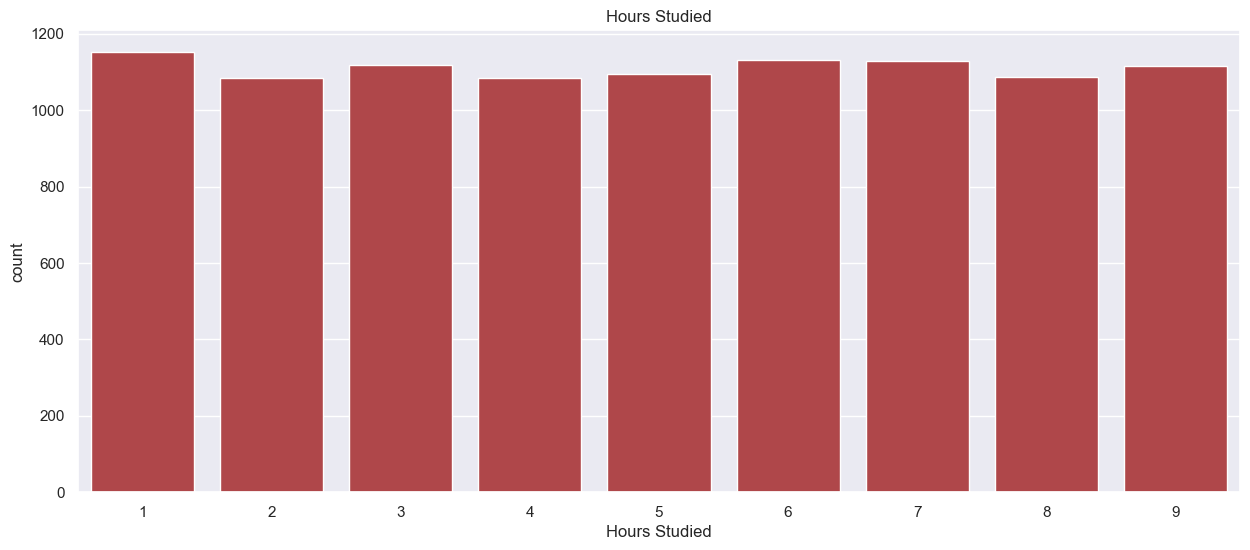

In [24]:
countplot("Hours Studied")

### Hours Studied
Grafik ini menunjukkan jumlah siswa berdasarkan jumlah jam yang mereka pelajari. Grafik ini tidak langsung memberikan informasi tentang kinerja siswa, tetapi lebih pada frekuensi siswa yang belajar selama jumlah jam. Setiap batang mewakili jumlah siswa yang belajar selama jumlah jam tertentu. Semua batang memiliki ketinggian yang hampir sama, menunjukkan jumlah yang serupa untuk setiap nilai jam.

In [25]:
df["Previous Scores"].unique()

array([99, 82, 51, 52, 75, 78, 73, 45, 77, 89, 91, 79, 47, 72, 83, 54, 96,
       74, 85, 61, 62, 84, 94, 90, 44, 70, 67, 97, 59, 55, 68, 63, 46, 76,
       43, 81, 93, 98, 48, 92, 64, 88, 60, 87, 40, 69, 80, 95, 49, 50, 53,
       71, 56, 58, 66, 65, 57, 41, 42, 86])

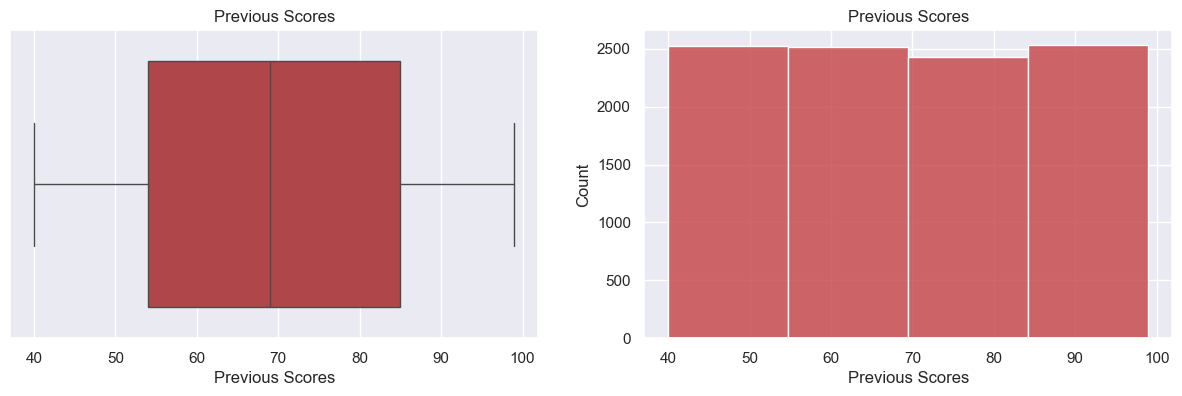

In [26]:
boxplot("Previous Scores")

### Previous Score
Grafik ini menunjukkan distribusi skor sebelumnya dari siswa. Boxplot menunjukkan bahwa sebagian besar siswa mendapat skor antara sekitar 70 dan 90. Histogram menunjukkan bahwa sejumlah besar siswa mendapat skor di kisaran 70-80 dan 80-90.

In [27]:
df["Extracurricular Activities"].unique()

array(['Yes', 'No'], dtype=object)

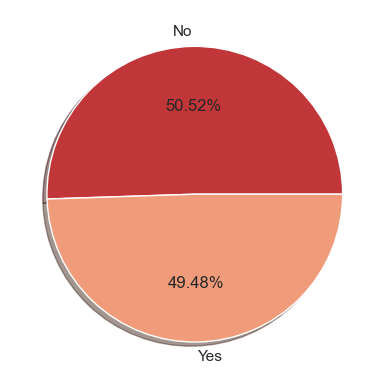

In [28]:
pieplot("Extracurricular Activities")

### Extracurricullar
Diagram ini menunjukkan pengaruh kegiatan ekstrakurikuler pada kinerja siswa. Dalam diagram pie ini, ada dua kategori: "Ya" dan "Tidak", yang mewakili siswa yang terlibat dan tidak terlibat dalam kegiatan ekstrakurikuler. Hampir setengah dari siswa (49,48%) terlibat dalam kegiatan ekstrakurikuler, sementara sedikit lebih dari setengah (50,52%) tidak terlibat

In [29]:
df["Sleep Hours"].unique()

array([9, 4, 7, 5, 8, 6])

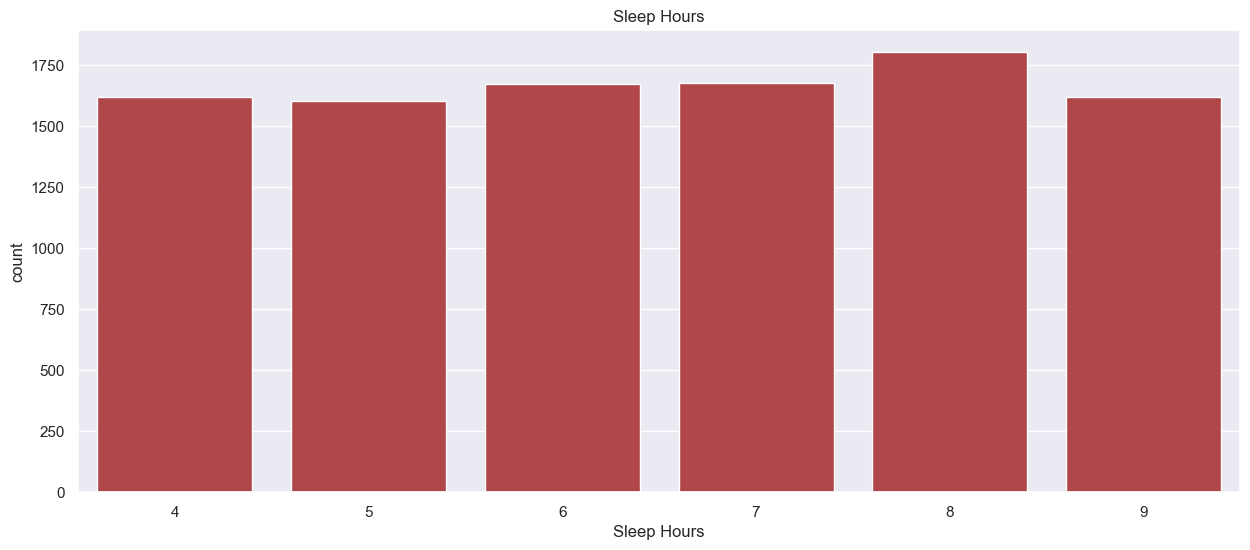

In [30]:
countplot("Sleep Hours")

### Sleep Hours
Grafik tersebut menunjukkan jumlah kinerja siswa berdasarkan jam tidur yang berbeda. Tidak ada variasi yang signifikan dalam kinerja siswa dengan perubahan jam tidur dari 4 hingga 9, karena semua batang memiliki tinggi yang hampir sama. Sumbu x mewakili "Jam Tidur" mulai dari 4 hingga 9 jam. Sumbu y mewakili jumlah, yang mencapai 1750. Ada enam batang merah yang mewakili setiap jam tidur dari 4 hingga 9 jam. Setiap batang hampir sama tingginya, menunjukkan jumlah yang serupa untuk setiap kategori jam tidur.

<Axes: >

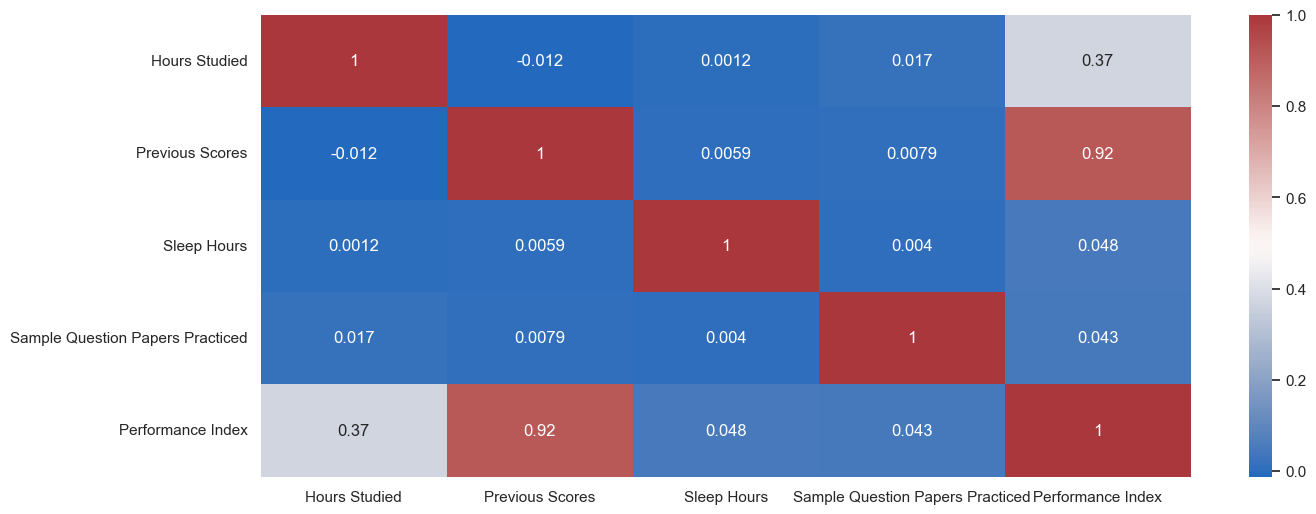

In [35]:
plt.figure(figsize=(15,6))
sns.heatmap(data=df.select_dtypes(exclude="object").corr(), annot=True, cmap="vlag")

### Heatmap
Heatmap tersebut menunjukkan korelasi antara berbagai faktor dan kinerja siswa, yang diwakili oleh Indeks Kinerja. Korelasi positif ditunjukkan dalam warna biru, sedangkan korelasi negatif dalam warna merah. Pengaruh positif terbesar pada kinerja siswa tampaknya adalah Nilai Sebelumnya, dengan koefisien korelasi 0,92.

Dari heatmap, kita dapat melihat beberapa pola berikut:

- Jam Belajar memiliki korelasi positif yang cukup kuat (0,37) dengan Indeks Kinerja, yang berarti semakin banyak siswa belajar, semakin baik kinerja mereka.
- Nilai Sebelumnya memiliki korelasi positif yang sangat kuat (0,92) dengan Indeks Kinerja, yang berarti siswa yang memiliki nilai bagus sebelumnya cenderung memiliki nilai bagus lagi.
- Jam Tidur memiliki korelasi positif yang lemah dengan semua variabel lain kecuali hubungan negatif yang sangat kecil dengan Nilai Sebelumnya (-0,012), yang berarti jam tidur tidak terlalu memengaruhi kinerja siswa.
- Kertas Soal Latihan memiliki korelasi positif yang lemah hingga sedang dengan semua variabel, yang berarti mengerjakan kertas soal latihan dapat meningkatkan kinerja siswa, tetapi tidak sebanyak jam belajar atau nilai sebelumnya.

## Kesimpulan
Dengan melihat hasil data dari heatmap di atas, variabel yang berhubungan dengan Performance Index dan menunjukkan angka yang paling tinggi merupakan variabel yang paling berpengaruh terhadap performa siswa dalam akademik. Berikut adalah variabel dengan angka yang paling tinggi:
1. Performance Index - Previous Scores dengan angka 0.92

2. Performance Index - Hours Studied dengan angka 0.37

3. Performance Index - Sleep Hours dengan angka 0.048

Berdasarkan angka tersebut, dapat disimpulkan bahwa variabel yang paling berpengaruh terhadap performa siswa dalam akademik adalah nilai siswa sebelumnya, nilai siswa sebelumnya, waktu yang dibutuhkan siswa untuk belajar, dan waktu tidur siswa. Ketiga variabel tersebut menunjukkan pengaruh yang signifikan terhadap performa siswa dalam akademik. 
